In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import numpy as np
%matplotlib inline

In [2]:
szkoly = pd.read_csv("../dane/szkoly2014.csv", index_col='id_szkoly')
ponadpodstawowe = szkoly[szkoly.typ_szkoly.isin(['LO', 'LOU', 'T', 'TU', 'LP'])]
# moze tez zawodowe?

In [3]:
wyniki = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")
wyniki['dziewczeta'] = wyniki['plec'] == "k"

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (2,4,5,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
wyniki.count()

Unnamed: 0                 352538
id_szkoly                  307656
plec                       307587
rocznik                    302682
dysleksja                  303405
biologia_laureat               84
biologia_podstawowa         26731
biologia_rozszerzona        28369
chemia_laureat                 74
chemia_podstawowa            8394
chemia_rozszerzona          22365
fizyka_laureat                 45
fizyka_podstawowa           12138
fizyka_rozszerzona          12421
geografia_laureat              69
geografia_podstawowa        34759
geografia_rozszerzona       25074
historia_laureat              105
historia_podstawowa          8369
historia_rozszerzona         7651
informatyka_laureat            61
informatyka_podstawowa       2061
informatyka_rozszerzona      2243
j_angielski_laureat            37
j_angielski_podstawowa     275255
j_angielski_rozszerzona     84169
j_polski_laureat              183
j_polski_podstawowa        307656
j_polski_rozszerzona        31864
matematyka_lau

In [5]:
wyniki['dysleksja'].mean()

0.0705459699082085

In [6]:
wyniki.columns

Index(['Unnamed: 0', 'id_szkoly', 'plec', 'rocznik', 'dysleksja', 'biologia_laureat', 'biologia_podstawowa', 'biologia_rozszerzona', 'chemia_laureat', 'chemia_podstawowa', 'chemia_rozszerzona', 'fizyka_laureat', 'fizyka_podstawowa', 'fizyka_rozszerzona', 'geografia_laureat', 'geografia_podstawowa', 'geografia_rozszerzona', 'historia_laureat', 'historia_podstawowa', 'historia_rozszerzona', 'informatyka_laureat', 'informatyka_podstawowa', 'informatyka_rozszerzona', 'j_angielski_laureat', 'j_angielski_podstawowa', 'j_angielski_rozszerzona', 'j_polski_laureat', 'j_polski_podstawowa', 'j_polski_rozszerzona', 'matematyka_laureat', 'matematyka_podstawowa', 'matematyka_rozszerzona', 'WOS_laureat', 'WOS_podstawowa', 'WOS_rozszerzona', 'dziewczeta'], dtype='object')

In [7]:
kol_laureat = list(filter(lambda x: x.endswith("laureat"), wyniki.columns))
kol_przedmioty = list(filter(lambda x: x.endswith("podstawowa") or x.endswith("rozszerzona"), wyniki.columns))
kol_demografia = ['dziewczeta', 'rocznik', 'dysleksja']
# uwaga: przy roczniku trzeba usunac wampiry i terminatory, by wynik mial sens

In [8]:
srednie = wyniki.groupby("id_szkoly")[kol_demografia + kol_przedmioty].mean()
srednie.columns = [col + "_sr" for col in srednie]

In [9]:
zliczenia = wyniki.groupby("id_szkoly")[kol_przedmioty + kol_laureat].count()
# tu tez laureacie, ale trzeba uwazac na sposob liczenia

In [10]:
srednie.head()

,dziewczeta_sr,rocznik_sr,biologia_podstawowa_sr,biologia_rozszerzona_sr,chemia_podstawowa_sr,chemia_rozszerzona_sr,fizyka_podstawowa_sr,fizyka_rozszerzona_sr,geografia_podstawowa_sr,geografia_rozszerzona_sr,...,informatyka_podstawowa_sr,informatyka_rozszerzona_sr,j_angielski_podstawowa_sr,j_angielski_rozszerzona_sr,j_polski_podstawowa_sr,j_polski_rozszerzona_sr,matematyka_podstawowa_sr,matematyka_rozszerzona_sr,WOS_podstawowa_sr,WOS_rozszerzona_sr
id_szkoly,,,,,,,,,,,,,,,,,,,,,
-8,0.482759,1991.604396,15.56,17.250000,10.5,NaN,11.25,NaN,18.928571,33.0,...,NaN,NaN,21.783375,28.500000,24.439201,18.307692,11.320683,10.500000,32.444444,11.0
21536,0.673077,1994.846154,15.00,43.000000,21.5,NaN,NaN,NaN,19.416667,22.0,...,13.5,NaN,26.628571,22.333333,31.557692,NaN,16.490196,10.000000,47.857143,23.0
21540,0.602041,1994.918367,20.50,21.055556,NaN,21.818182,27.70,31.571429,23.500000,38.9,...,NaN,NaN,38.714286,31.875000,42.306122,25.500000,30.010204,22.947368,NaN,22.5
21541,0.583333,1994.416667,17.00,NaN,13.5,NaN,NaN,NaN,28.500000,NaN,...,NaN,NaN,25.575000,33.833333,29.166667,NaN,16.958333,NaN,NaN,NaN
21543,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.000000,NaN,37.000000,NaN,11.000000,NaN,NaN,NaN


In [11]:
zliczenia.head()

,biologia_podstawowa,biologia_rozszerzona,chemia_podstawowa,chemia_rozszerzona,fizyka_podstawowa,fizyka_rozszerzona,geografia_podstawowa,geografia_rozszerzona,historia_podstawowa,historia_rozszerzona,...,biologia_laureat,chemia_laureat,fizyka_laureat,geografia_laureat,historia_laureat,informatyka_laureat,j_angielski_laureat,j_polski_laureat,matematyka_laureat,WOS_laureat
id_szkoly,,,,,,,,,,,,,,,,,,,,,
-8,25,4,4,0,4,0,14,1,7,2,...,0,0,0,0,0,0,0,0,0,0
21536,7,1,2,0,0,0,12,1,2,0,...,0,0,0,0,0,0,0,0,0,0
21540,10,18,0,11,10,7,8,10,1,2,...,0,0,0,0,0,0,0,0,0,0
21541,5,0,2,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
szkoly_zwynikowione = ponadpodstawowe.join(srednie).join(zliczenia)

In [13]:
szkoly_zwynikowione['j_polski_podstawowa'].head()

id_szkoly
25302    51
25300    22
25298    99
25499    12
76995    12
Name: j_polski_podstawowa, dtype: float64

In [14]:
(szkoly_zwynikowione[kol_laureat]/szkoly_zwynikowione['j_polski_podstawowa']).head()

/usr/local/lib/python3.4/site-packages/pandas/core/index.py:1266: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)


,biologia_laureat,chemia_laureat,fizyka_laureat,geografia_laureat,historia_laureat,informatyka_laureat,j_angielski_laureat,j_polski_laureat,matematyka_laureat,WOS_laureat,...,27265,27305,27321,31366,76679,77369,77475,77495,22704,23886
id_szkoly,,,,,,,,,,,,,,,,,,,,,
25302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


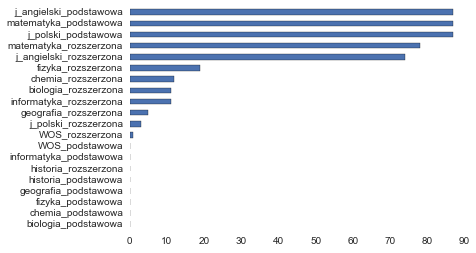

In [15]:
szkoly_zwynikowione.loc[21675, kol_przedmioty].order().plot(kind='barh');

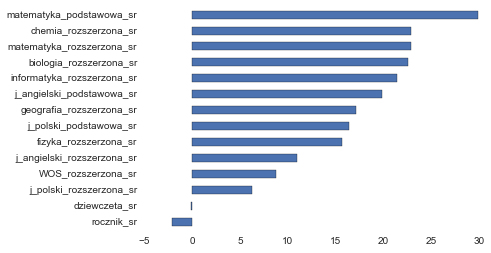

In [16]:
(szkoly_zwynikowione.loc[21675] - szkoly_zwynikowione.mean())[srednie.columns].dropna().order().plot(kind='barh');

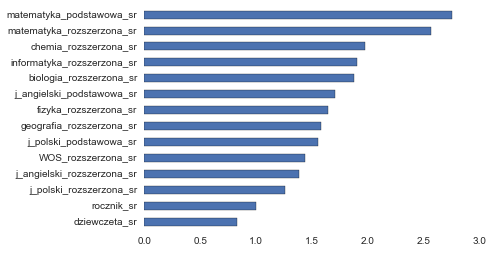

In [17]:
#sensowniej chyba jako stosunek
(szkoly_zwynikowione.loc[21675]/szkoly_zwynikowione.mean())[srednie.columns].dropna().order().plot(kind='barh');

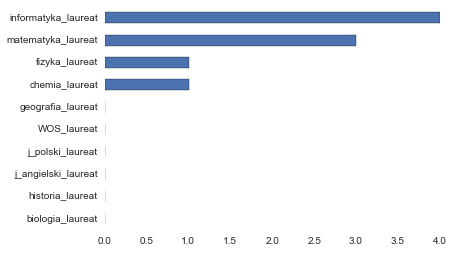

In [18]:
szkoly_zwynikowione.loc[21675, kol_laureat].order().plot(kind='barh');

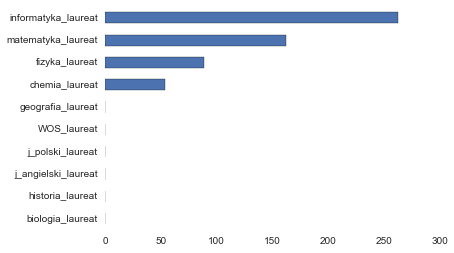

In [19]:
(szkoly_zwynikowione.loc[21675, kol_laureat]/wyniki[kol_laureat].fillna(0).mean()/88) \
  .order().plot(kind='barh');

In [20]:
lo_bb = szkoly_zwynikowione.query("miejscowosc == 'Bielsko-Biała' & typ_szkoly == 'LO'")

In [21]:
lo_bb[['nazwa_szkoly', 'adres', 'j_polski_podstawowa_sr', 'matematyka_podstawowa_sr']] \
  .sort(['matematyka_podstawowa_sr'], ascending=False)

,nazwa_szkoly,adres,j_polski_podstawowa_sr,matematyka_podstawowa_sr
id_szkoly,,,,
21675,Zespół Szkół i Placówek Oświatowych w Bielsku-...,Słowackiego 45,46.068966,46.965517
21687,Liceum Ogólnokształcące Katolickiego Towarzyst...,Krasińskiego 17,45.928571,38.285714
21671,III Liceum Ogólnokształcące im. Stefana Żeroms...,Bohaterów Warszawy 20,45.090000,37.730000
21673,I Liceum Ogólnokształcące im. Mikołaja Koperni...,Listopadowa 70,45.026316,36.852632
21656,Liceum Ogólnokształcące Towarzystwa Szkolnego ...,A. Frycza Modrzewskiego 12,39.190476,33.634146
21674,IV Liceum Ogólnokształcące,Słowackiego 15,45.531250,31.843750
21681,Liceum Ogólnokształcące nr 8,Konopnickiej 6,44.000000,28.484615
21676,Liceum Ogólnokształcące Zgromadzenia Córek Boż...,Broniewskiego 13,46.208333,27.208333
21672,Zespół Szkól Ogólnokształcących w Bielsku-Biał...,Jutrzenki 13,37.024793,26.842975


In [22]:
lo_bb[['nazwa_szkoly', 'adres', 'j_polski_rozszerzona_sr', 'j_polski_rozszerzona', 'matematyka_rozszerzona_sr', 'matematyka_rozszerzona']] \
  .sort(['j_polski_rozszerzona_sr'], ascending=False)

,nazwa_szkoly,adres,j_polski_rozszerzona_sr,j_polski_rozszerzona,matematyka_rozszerzona_sr,matematyka_rozszerzona
id_szkoly,,,,,,
21655,Dwujęzyczne Liceum Ogólnokształcące im. W. Kop...,Legionów 24,37.000000,1,33.500000,2
21687,Liceum Ogólnokształcące Katolickiego Towarzyst...,Krasińskiego 17,32.500000,4,26.222222,9
21684,Liceum Ogólnokształcące im. Tadeusza Kościuszki,Legionów 30,32.000000,1,6.000000,2
21676,Liceum Ogólnokształcące Zgromadzenia Córek Boż...,Broniewskiego 13,30.333333,6,22.000000,1
21675,Zespół Szkół i Placówek Oświatowych w Bielsku-...,Słowackiego 45,30.000000,3,37.410256,78
21656,Liceum Ogólnokształcące Towarzystwa Szkolnego ...,A. Frycza Modrzewskiego 12,29.000000,7,29.357143,14
21672,Zespół Szkól Ogólnokształcących w Bielsku-Biał...,Jutrzenki 13,28.043478,23,10.347826,23
21686,Liceum Ogólnokształcące Mistrzostwa Sportowego...,Pl. Wolności 10,28.000000,1,NaN,0
21673,I Liceum Ogólnokształcące im. Mikołaja Koperni...,Listopadowa 70,27.340909,44,25.033333,90


In [23]:
bb_zdawane = lo_bb[['nazwa_szkoly'] + kol_przedmioty].set_index('nazwa_szkoly').dropna()

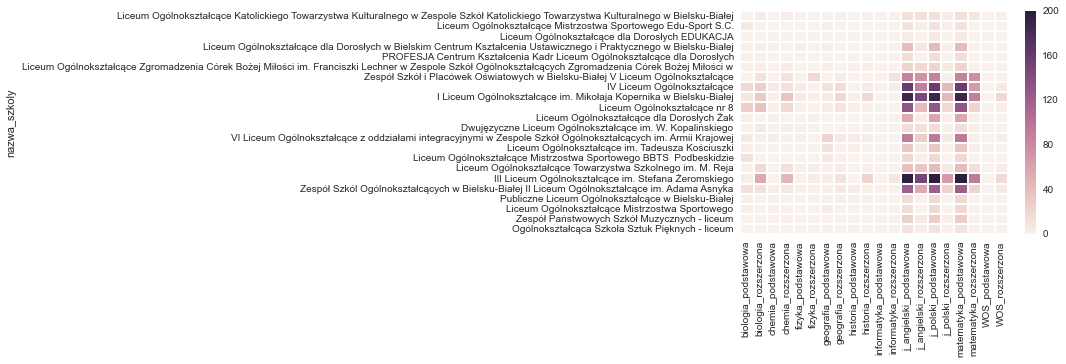

In [24]:
sns.heatmap(bb_zdawane);

In [25]:
# sns.heatmap((bb_zdawane.transpose()/bb_zdawane['j_polski_podstawowa']).transpose());

In [ ]:
sns.clustermap((bb_zdawane.transpose()/bb_zdawane['j_polski_podstawowa']).transpose(),
               method='ward');
# z_score=1 crashes all
# metric='correlation' or 'cosine' as well

In [30]:
sns.clustermap?

In [28]:
from scipy import spatial

In [29]:
spatial.distance?